In [14]:
import pandas as pd
import numpy as np
import arviz as az

In [15]:
df_brazil = pd.read_excel(r'alldatasets.xlsx',sheet_name='Brazil')

In [16]:
df_brazil.head()

,childid,country,height,stunting_2cat,EDUYRS2,z_score,agegapr1,momeduyrsr1,chsexr1,agemonr1,hhsizer1,wi_newr1,job_cat,pvt_sector,earn_usd
0,BR1,Brazil,180.35,0.0,16.0,0.399053,0.0,5.0,1,50.0,3.0,0.306352,3.0,1,290.316010
1,BR2,Brazil,164.95,0.0,15.0,0.002132,NaN,5.0,0,52.0,3.0,0.533106,3.0,1,109.973544
2,BR8,Brazil,167.10,1.0,5.0,-2.061853,6.0,5.0,1,49.0,12.0,0.115514,3.0,1,109.973544
3,BR12,Brazil,174.75,0.0,13.0,1.351661,2.0,6.0,1,51.0,5.0,0.597647,3.0,1,1060.838040
4,BR14,Brazil,179.35,0.0,11.0,0.557821,NaN,10.0,1,50.0,3.0,0.483788,3.0,1,353.612680


In [17]:
df_brazil.columns

Index(['childid', 'country', 'height', 'stunting_2cat', 'EDUYRS2', 'z_score',
       'agegapr1', 'momeduyrsr1', 'chsexr1', 'agemonr1', 'hhsizer1',
       'wi_newr1', 'job_cat', 'pvt_sector', 'earn_usd'],
      dtype='object')

In [18]:
from scipy import stats
import scipy.stats as stats

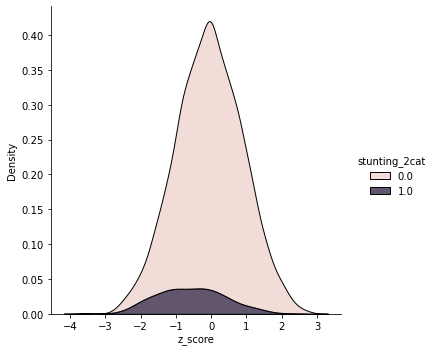

In [19]:
import seaborn as sns
sns.displot(df_brazil, x="z_score", hue="stunting_2cat", kind="kde", multiple="stack")

# Bayesian

In [20]:
Y = df_brazil['z_score']
X = df_brazil[['stunting_2cat', 'agegapr1', 'momeduyrsr1', 'chsexr1', 'agemonr1','wi_newr1',
       'hhsizer1']]

In [21]:
formula = 'z_score ~ ' + ' + '.join(['%s' % variable for variable in X.columns[0:]])
formula

'z_score ~ stunting_2cat + agegapr1 + momeduyrsr1 + chsexr1 + agemonr1 + wi_newr1 + hhsizer1'

In [22]:
import warnings
warnings.filterwarnings("ignore")

In [23]:
import pymc3 as pm

# Context for the model
with pm.Model() as normal_model:
    
    my_priors= {
        'Intercept': pm.Normal.dist(mu=0, sigma=10.),
        'stunting_2cat': pm.Normal.dist(mu=1, sigma=1),
        'agegapr1': pm.Normal.dist(mu=1, sigma=1),
        'momeduyrsr1': pm.Normal.dist(mu=1, sigma=1),
        'chsexr1': pm.Normal.dist(mu=1, sigma=1),
        'agemonr1': pm.Normal.dist(mu=1, sigma=1),
        'wi_newr1': pm.Normal.dist(mu=1, sigma=1),
        'hhsizer1': pm.Normal.dist(mu=1, sigma=1)
    }
    
    
    
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula, data = df_brazil, priors=my_priors)
    
    # Perform Markov Chain Monte Carlo sampling letting PyMC3 choose the algorithm
    normal_trace = pm.sample(draws=5000, chains = 2, tune = 2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sd, hhsizer1, wi_newr1, agemonr1, chsexr1, momeduyrsr1, agegapr1, stunting_2cat, Intercept]


Sampling 2 chains for 2_000 tune and 5_000 draw iterations (4_000 + 10_000 draws total) took 70 seconds.


In [24]:
az.summary(normal_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Intercept,-1.715,0.267,-2.203,-1.204,0.004,0.003,4869.0,4869.0,4870.0,5595.0,1.0
stunting_2cat,-0.205,0.076,-0.348,-0.063,0.001,0.001,8733.0,8150.0,8750.0,6570.0,1.0
agegapr1,0.001,0.005,-0.009,0.011,0.000,0.000,8304.0,5413.0,8319.0,7206.0,1.0
momeduyrsr1,0.067,0.006,0.054,0.078,0.000,0.000,7687.0,7596.0,7688.0,6847.0,1.0
chsexr1,0.077,0.043,-0.001,0.158,0.000,0.000,9129.0,8159.0,9136.0,7343.0,1.0
agemonr1,0.021,0.006,0.010,0.032,0.000,0.000,5080.0,5080.0,5085.0,5892.0,1.0
wi_newr1,1.347,0.137,1.094,1.607,0.002,0.001,7896.0,7890.0,7902.0,7415.0,1.0
hhsizer1,-0.068,0.012,-0.090,-0.046,0.000,0.000,8061.0,7994.0,8055.0,7563.0,1.0
sd,0.819,0.015,0.791,0.846,0.000,0.000,9859.0,9854.0,9861.0,7141.0,1.0


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'stunting_2cat'}>,
        <AxesSubplot:title={'center':'stunting_2cat'}>],
       [<AxesSubplot:title={'center':'agegapr1'}>,
        <AxesSubplot:title={'center':'agegapr1'}>],
       [<AxesSubplot:title={'center':'momeduyrsr1'}>,
        <AxesSubplot:title={'center':'momeduyrsr1'}>],
       [<AxesSubplot:title={'center':'chsexr1'}>,
        <AxesSubplot:title={'center':'chsexr1'}>],
       [<AxesSubplot:title={'center':'agemonr1'}>,
        <AxesSubplot:title={'center':'agemonr1'}>],
       [<AxesSubplot:title={'center':'wi_newr1'}>,
        <AxesSubplot:title={'center':'wi_newr1'}>],
       [<AxesSubplot:title={'center':'hhsizer1'}>,
        <AxesSubplot:title={'center':'hhsizer1'}>],
       [<AxesSubplot:title={'center':'sd'}>,
        <AxesSubplot:title={'center':'sd'}>]], dtype=object)

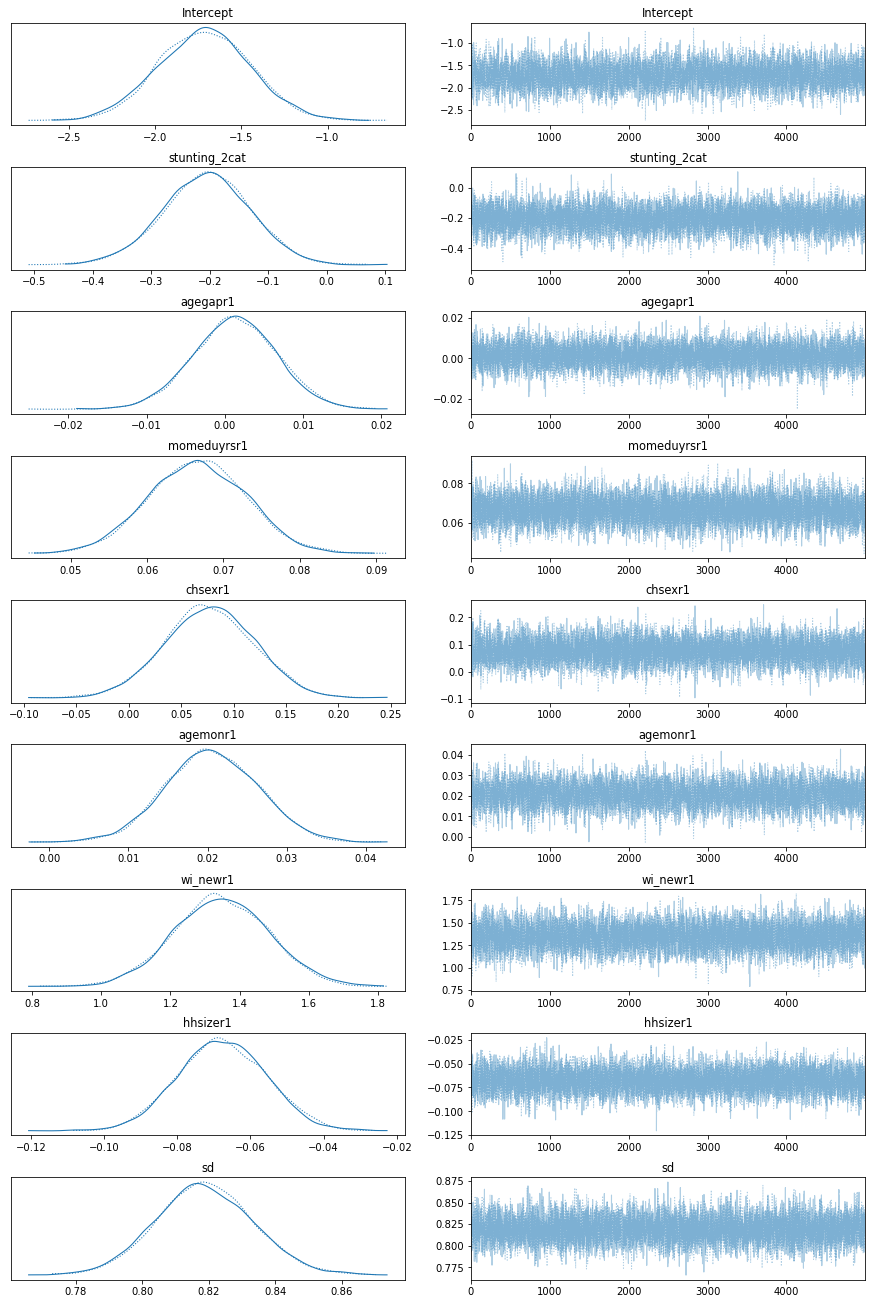

In [25]:
az.plot_trace(normal_trace)

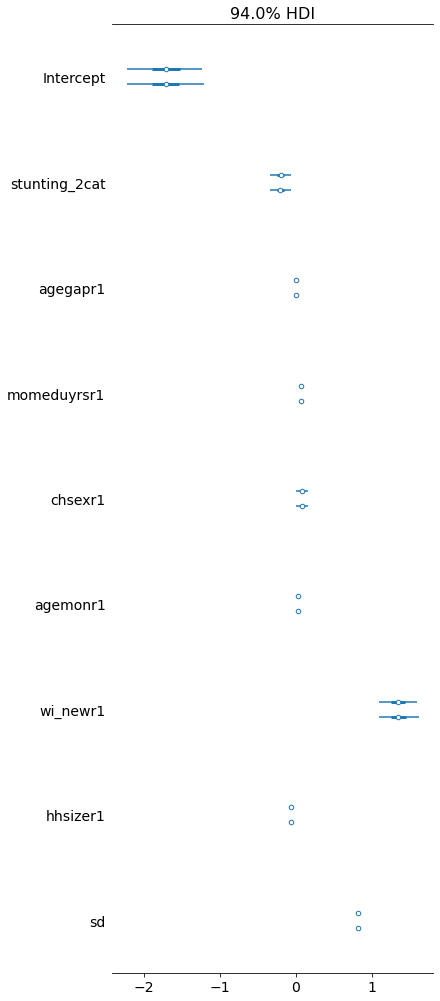

In [26]:
az.plot_forest(normal_trace);